In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def mse(array):
    return np.mean(array.flatten() ** 2)

In [3]:
p = np.array([[1,1], 
              [1,2], 
              [2,-1], 
              [2,0], 
              [-1,2], 
              [-2,1], 
              [-1,-1], 
              [-2,-2]], dtype='float')

t = np.array([[-1,-1],
              [-1,-1],
              [-1,1],
              [-1,1],
              [1,-1],
              [1,-1],
              [1,1],
              [1,1]], dtype='float')

weight = np.array([[1,0],
                   [0,1]], dtype='float')
bias = np.array([[1,1]], dtype='float')
errors = np.zeros([8,2], dtype='float')
mean_squared_error = 1
mse_iterations = []

learning_rate = 0.01
error_threshold = 0.121

In [4]:
while mean_squared_error > error_threshold:
    errors = np.zeros_like(t)  # same shape as t
    for i in range(len(p)):
        a = np.dot(weight, p[i]) + bias       # prediction
        e = t[i] - a                          # error
        errors[i] = e 
        
        weight = weight + 2 * learning_rate * np.outer(e, p[i])
        bias = bias + 2 * learning_rate * e
    mean_squared_error = mse(errors)
    mse_iterations.append(mean_squared_error)

print(weight)
print("Final MSE: " + str(mse(errors)))

[[-0.58244574 -0.04046309]
 [ 0.18099466 -0.65990448]]
Final MSE: 0.12098985017112973


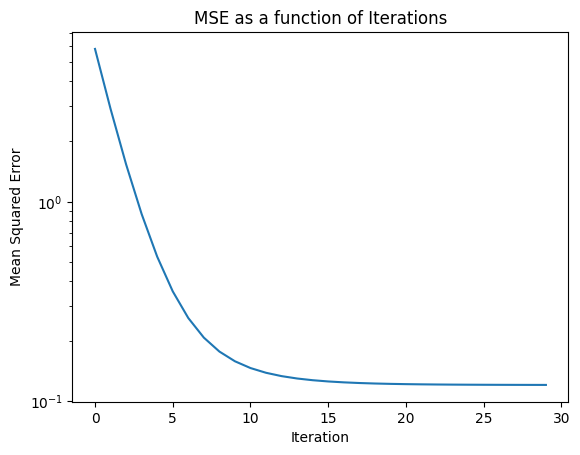

In [5]:
plt.title("MSE as a function of Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.semilogy(mse_iterations)

In [6]:
dt = np.dtype([('input', 'U2'), ('t1', 'f8'), ('t2', 'f8'), ('t3', 'f8'), ('t4', 'f8')])
table = np.zeros(len(p), dtype=dt)
for i in range(0, len(p)):
    actual_output = np.dot(weight, p[i]) + bias
    
    table[i] = np.array([("p" + str(i+1), mse([-1,-1] - actual_output), mse([-1,1] - actual_output), mse([1,-1] - actual_output), mse([1,1] - actual_output))], dtype=dt)

print("  MSE between each output and the 4 classes")
print(pd.DataFrame(table))

  MSE between each output and the 4 classes
  input        t1        t2        t3        t4
0    p1  0.328490  0.918087  1.529313  2.118909
1    p2  0.065512  1.974917  1.347260  3.256666
2    p3  2.438424  0.026414  4.642286  2.230276
3    p4  1.205352  0.113150  3.490139  2.397938
4    p5  1.211461  3.844846  0.163427  2.796811
5    p6  2.317803  3.993368  0.023951  1.699516
6    p7  2.736501  1.410459  1.445688  0.119646
7    p8  4.866561  2.582699  2.329931  0.046069
